#**Importaciones necesarias**

In [1]:
import os
import numpy as np
import cv2 as cv
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt
from skimage.feature import hog
from google.colab.patches import cv2_imshow

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from keras.utils import plot_model
from skimage import data, exposure

#**Filtros**

- Filtro de media  
- Filtro de mediana  
- Filtro logarítmico 
- Filtro de cuadro normalizado   
- Filtro gaussiano  
- Filtro Laplace  
- Filtro Sobel  
- Filtro Canny  


<ipython-input-4-853a12ff8e81>:11: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(img + 1))


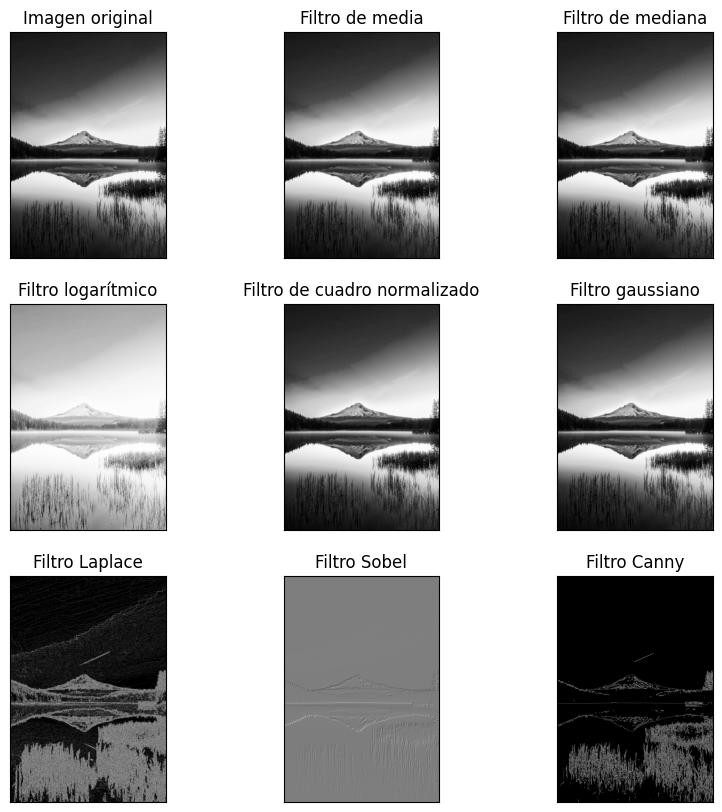

In [ ]:
img = cv.imread('imagenes/captura1.png',  cv.IMREAD_GRAYSCALE) 

# A. Filtro de media:
mean_filter = cv.blur(img, (5, 5))

# B. Filtro de mediana:
median_filter = cv.medianBlur(img, 5)

# C. Filtro logarítmico:
c = 255 / np.log(1 + np.max(img))
log_image = c * (np.log(img + 1))
log_image = np.array(log_image, dtype=np.uint8)

# D. Filtro de cuadro normalizado:
box_filter = cv.boxFilter(img, -1, (5, 5), normalize=True)

# E. Filtro gaussiano:
gaussian_filter = cv.GaussianBlur(img, (5, 5), 0)

# F. Filtro Laplace:
laplacian_filter = cv.Laplacian(img, cv.CV_32F, ksize=5)
laplacian_filter = np.uint8(np.absolute(laplacian_filter))

# G. Filtro Sobel:
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)
sobel_filter = cv.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# H. Filtro Canny:
canny_filter = cv.Canny(img, 100, 200)

plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Imagen original'), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 2), plt.imshow(mean_filter, cmap='gray')
plt.title('Filtro de media'), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 3), plt.imshow(median_filter, cmap='gray')
plt.title('Filtro de mediana'), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 4), plt.imshow(log_image, cmap='gray')
plt.title('Filtro logarítmico'), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 5), plt.imshow(box_filter, cmap='gray')
plt.title('Filtro de cuadro normalizado'), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 6), plt.imshow(gaussian_filter, cmap='gray')
plt.title('Filtro gaussiano'), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 7), plt.imshow(laplacian_filter, cmap='gray')
plt.title('Filtro Laplace'), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 8), plt.imshow(sobel_filter, cmap='gray')
plt.title('Filtro Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 9), plt.imshow(canny_filter, cmap='gray')
plt.title('Filtro Canny'), plt.xticks([]), plt.yticks([])
plt.show()


## Aplicación del **filtro de media** manualmente:

In [17]:
# Función para aplicar un filtro de media manualmente
def mean_filter(image, kernel):
    
    # Obtener la forma de la imagen y crear una imagen vacía del mismo tamaño
    shape = image.shape
    filtered_image = np.zeros(shape, dtype=np.float32)
    
    # Obtener el tamaño del kernel y calcular el radio
    kernel_radius = kernel.shape[0] // 2
    
    # Recorrer cada píxel de la imagen
    for i in range(shape[0]):
        for j in range(shape[1]):
            pixel_sum = 0
            count = 0
            
            # Recorrer cada píxel vecino dentro del kernel
            for k in range(-kernel_radius, kernel_radius+1):
                for l in range(-kernel_radius, kernel_radius+1):
                    
                    # Comprobar si el píxel vecino está dentro de la imagen
                    if i+k >= 0 and i+k < shape[0] and j+l >= 0 and j+l < shape[1]:
                        
                        # Sumar el valor del píxel vecino a la suma total
                        pixel_sum += image[i+k, j+l]
                        count += 1
            
            # Calcular el valor del píxel filtrado
            filtered_image[i, j] = pixel_sum / count
    
    filtered_image = np.uint8(filtered_image)
    return filtered_image
    

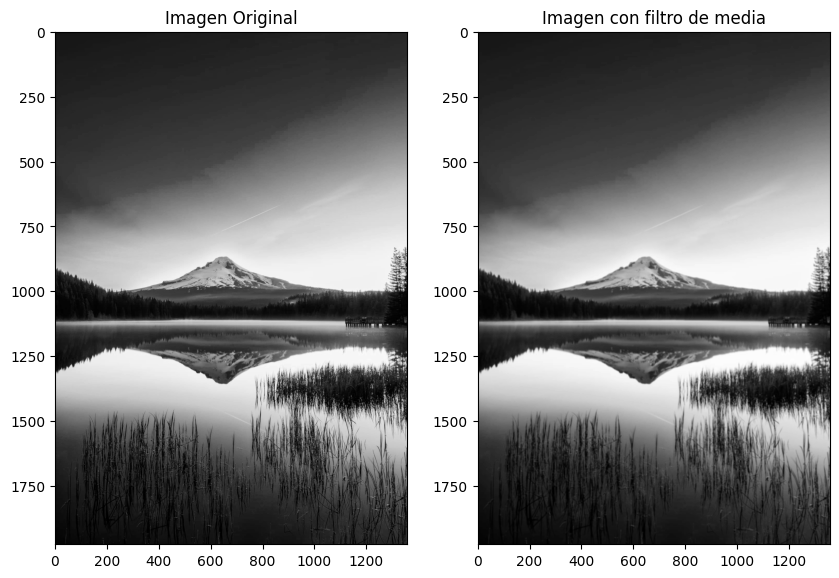

In [18]:
#Creación del kernel para el filtro de media
kernel = np.ones((5, 5))

# Cargar una imagen en escala de grises
img = cv.imread('imagenes/captura1.png',  cv.IMREAD_GRAYSCALE) 

filtered_img = mean_filter(img, kernel)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.imshow(img, cmap='gray')
ax1.set_title('Imagen Original')
ax2.imshow(filtered_img, cmap='gray')
ax2.set_title('Imagen con filtro de media')
plt.show()

# **Descriptores**

##HOG

<ipython-input-2-eae5884dd69e>:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),


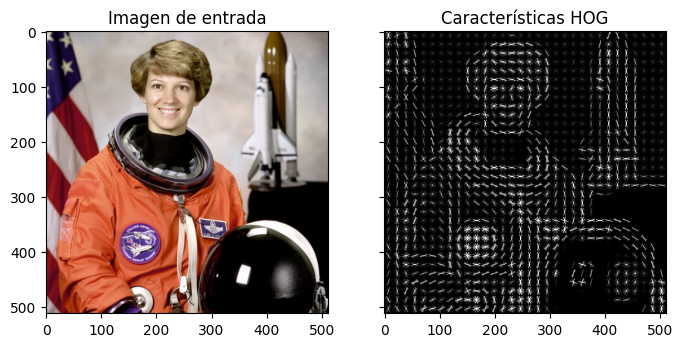

In [2]:
image = data.astronaut()

# Calcula las características HOG de la imagen
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

# Ajusta el contraste de la imagen para resaltar las características HOG
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Visualiza la imagen original y las características HOG
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Imagen de entrada')

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Características HOG')
plt.show()


##SIFT

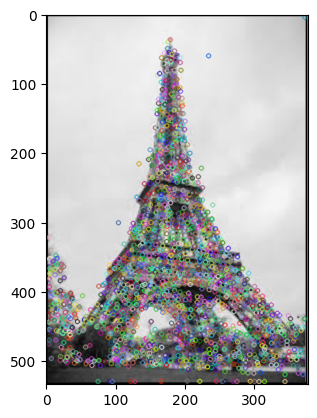

In [4]:
img1 = cv.imread('imagenes/captura3.png') 
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

#keypoints
sift = cv.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)


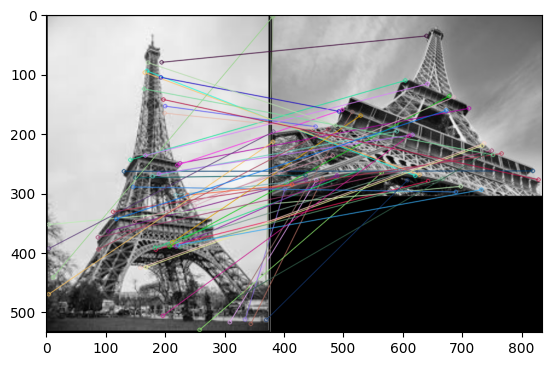

(<matplotlib.image.AxesImage at 0x7f12b5845690>, None)

In [3]:
img1 = cv.imread('imagenes/captura3.png')  
img2 = cv.imread('imagenes/captura2.png') 

img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

#sift
sift = cv.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()


## **Extracción de características a un banco de datos mediante la técnica HOG**

In [ ]:
# Carga el archivo ZIP usando zipfile
with ZipFile('BASE_DATOS.zip', 'r') as zip:
  # Extrae todo el contenido
  zip.extractall()
  
# Verifica que los archivos hayan sido extraídos correctamente
os.listdir()
del zip

In [ ]:
RutaProyecto = os.getcwd()
clases = os.listdir(RutaProyecto + '/BASE_DATOS')
clases = sorted(clases)#Organizar las clases ascendentemente
clases_dict = {itemClass: i for i, itemClass in enumerate(clases)}

# Definición de descriptor HOG
hog = cv.HOGDescriptor((64,64), (16,16), (8,8), (8,8), 9)

x_in = []
y_out = []

for clase in clases:
    Path = RutaProyecto + '/BASE_DATOS/' + clase
    ListaImagenes = os.listdir(Path)

    for imagen in ListaImagenes:
        imagenOriginal = cv.imread(Path + '/' + imagen, cv.IMREAD_GRAYSCALE)
        
        # Si la imagen no se puede leer
        if imagenOriginal is None or imagenOriginal.shape == (0, 0):
            print("Error!: " + Path + '/' + imagen)
        
        # Aplicar HOG a la imagen
        else:
            # Debemos asegurarnos de hacer resize a todas las imagenes
            imagenResize = cv.resize(imagenOriginal, (64, 64), interpolation = cv.INTER_AREA)
            
            # Aplicacion de un filtro gaussiano a la imagen
            imagenFilter = cv.GaussianBlur(imagenResize, (5, 5), 0)

            # Calculo del descriptor HOG
            descriptor = hog.compute(imagenFilter)
            
            x_in.append(descriptor.T)
            y_out.append(clases_dict[clase])
           
# Convertir vectores de entrenamiento y etiquetas a un DataFrame de Pandas
df = pd.DataFrame(np.hstack((x_in, np.array(y_out)[:, np.newaxis])),
                  columns=["feature_{}".format(i+1) for i in range(len(x_in[0]))] + ["y_out"])

# Guardar el DataFrame en un archivo .csv
rutaSalida = RutaProyecto + '/BASE_DATOS_SALIDA'
if os.path.exists(rutaSalida):
    #print('Guardando el archivo')  
    df.to_csv(rutaSalida + '/descriptoresHOG.csv', index=False)
else:
    #print('No existe, se crea la carpeta')
    os.mkdir(rutaSalida)
    df.to_csv(rutaSalida + '/descriptoresHOG.csv', index=False)


In [ ]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1756,feature_1757,feature_1758,feature_1759,feature_1760,feature_1761,feature_1762,feature_1763,feature_1764,y_out
0,0.019188,0.017472,0.052284,0.000000,0.445181,0.000000,0.033709,0.011265,0.019188,0.045260,...,0.000429,0.013377,0.064550,0.312530,0.343606,0.000000,0.001344,0.000449,0.000429,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003043,0.099494,0.255516,0.070580,0.003126,0.000000,0.000000,0.000000,0.000732,0.0
2,0.009721,0.053171,0.165560,0.260087,0.260087,0.055061,0.043919,0.009672,0.001516,0.058310,...,0.000000,0.000605,0.001811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.036863,0.023226,0.011537,0.008616,0.002316,0.000000,0.000000,0.000000,0.005230,0.355222,...,0.314283,0.272180,0.216780,0.222984,0.109665,0.031034,0.013181,0.014885,0.314283,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.049285,0.036666,0.109718,0.000000,0.406976,0.000000,0.121367,0.040559,0.049285,0.015348,...,0.011373,0.047031,0.157435,0.299876,0.239378,0.105154,0.073284,0.040593,0.043078,3.0
329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.144309,0.102988,0.165232,0.087737,0.023400,0.089877,0.130281,0.153085,0.076054,3.0
330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0


## **Entrenamiento de los descriptores HOG usando Redes Neuronales**

### Cargar Base de Datos

In [6]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('BASE_DATOS_SALIDA/descriptoresHOG.csv')
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1756,feature_1757,feature_1758,feature_1759,feature_1760,feature_1761,feature_1762,feature_1763,feature_1764,y_out
0,0.019188,0.017472,0.052284,0.000000,0.445181,0.000000,0.033709,0.011265,0.019188,0.045260,...,0.000429,0.013377,0.064550,0.312530,0.343606,0.000000,0.001344,0.000449,0.000429,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003043,0.099494,0.255516,0.070580,0.003126,0.000000,0.000000,0.000000,0.000732,0.0
2,0.009721,0.053171,0.165560,0.260087,0.260087,0.055061,0.043919,0.009672,0.001516,0.058310,...,0.000000,0.000605,0.001811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.036863,0.023226,0.011537,0.008616,0.002316,0.000000,0.000000,0.000000,0.005230,0.355222,...,0.314283,0.272180,0.216780,0.222984,0.109665,0.031034,0.013181,0.014885,0.314283,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.049285,0.036666,0.109718,0.000000,0.406976,0.000000,0.121367,0.040559,0.049285,0.015348,...,0.011373,0.047031,0.157435,0.299876,0.239378,0.105154,0.073284,0.040593,0.043078,3.0
329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.144309,0.102988,0.165232,0.087737,0.023400,0.089877,0.130281,0.153085,0.076054,3.0
330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0


In [9]:
x = np.array(df.drop(["y_out"], axis=1))
y=np.array(df.y_out)

print(x.shape)
print(y.shape)

(333, 1764)
(333,)


(333, 1764)
(333,)


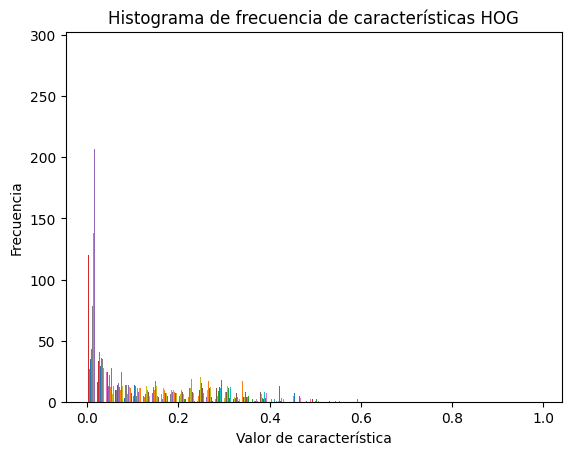

In [ ]:
# calcula la frecuencia de valores para cada característica
freq, bins = np.histogram(x, bins=50)

# crea el histograma
plt.hist(x, bins=bins)
plt.xlabel('Valor de característica')
plt.ylabel('Frecuencia')
plt.title('Histograma de frecuencia de características HOG')
plt.grid()
plt.show()


Se pueden visualizar datos de **Cero** en el dataset, esto es normal cuando se ulitiza la técnica HOG. Por lo tanto, la presencia de características nulas en una imagen también puede ser una característica distintiva que ayuda a diferenciarla de otras imágenes. Así, como que pueden proporcionar información importante sobre la estructura de la imagen.

### Visualización de la variable objetivo

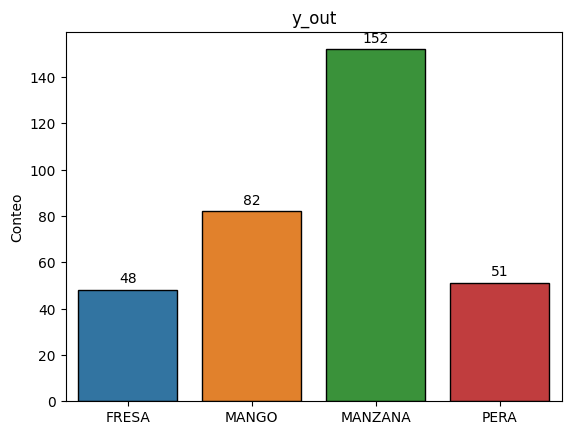

In [10]:
# Crear el gráfico de barras 
labels = ['FRESA', 'MANGO', 'MANZANA', 'PERA']
ax = sns.countplot(data=df, x='y_out', linewidth=1, edgecolor='black')
ax.set_title('y_out')
ax.set_xlabel('')
ax.set_ylabel('Conteo')
ax.set_xticklabels(labels)

# Añadir el número de conteo encima de cada barra
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', size=10, xytext=(0, 8),
                textcoords='offset points')

plt.show()


### Aplicando metodología de validación de train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109)
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

### One Hot Encoding de la variable objetivo

In [12]:
y_train_categorical = to_categorical(y_train, num_classes=4)
y_test_categorical = to_categorical(y_test, num_classes=4)
#print(y_train_categorical)
#print(y_test_categorical)

### Entrenamiento de la red

In [13]:
input_dim = x.shape[1]
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                112960    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 115,172
Trainable params: 115,172
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x_train, y_train_categorical, epochs=100, batch_size=32, validation_data=(x_test, y_test_categorical))

# make predictions on the test set
y_pred = model.predict(x_test)

# convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)


Epoch 1/100
8/8 [==============================] - 1s 51ms/step - loss: 1.1718 - accuracy: 0.5021 - val_loss: 0.9404 - val_accuracy: 0.6200
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.8643 - accuracy: 0.6009 - val_loss: 0.8027 - val_accuracy: 0.6500
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7229 - accuracy: 0.6438 - val_loss: 0.7376 - val_accuracy: 0.7300
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6196 - accuracy: 0.7811 - val_loss: 0.6584 - val_accuracy: 0.7700
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.4949 - accuracy: 0.8712 - val_loss: 0.5878 - val_accuracy: 0.7800
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.4279 - accuracy: 0.8884 - val_loss: 0.5301 - val_accuracy: 0.8100
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.3201 - accuracy: 0.9571 - val_loss: 0.5001 - val_accuracy: 0.8200
Epoch 8/100
8/8 [====

### Métricas de desempeño

accuracy:  0.85
precision:  0.854175824175824
recall:  0.85
f1:  0.8506869381096184
error:  0.15000000000000002


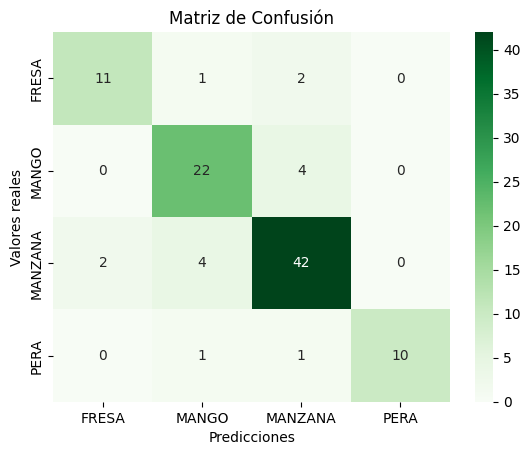

In [15]:
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall= recall_score(y_test, y_pred_classes, average='weighted')
f1= f1_score(y_test, y_pred_classes, average='weighted')
error=1-accuracy

print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1: ", f1)
print("error: ", error)

#Grafica Matriz de confusión
cf_matrix = confusion_matrix(y_test, y_pred_classes)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens', fmt='g')

# Configurar el título y las etiquetas de los ejes
ax.set_title('Matriz de Confusión')
ax.set_xlabel('Predicciones')
ax.set_ylabel('Valores reales')
ax.xaxis.set_ticklabels(['FRESA', 'MANGO', 'MANZANA', 'PERA'])
ax.yaxis.set_ticklabels(['FRESA', 'MANGO', 'MANZANA', 'PERA'])
plt.show()


### Distribución de los resultados

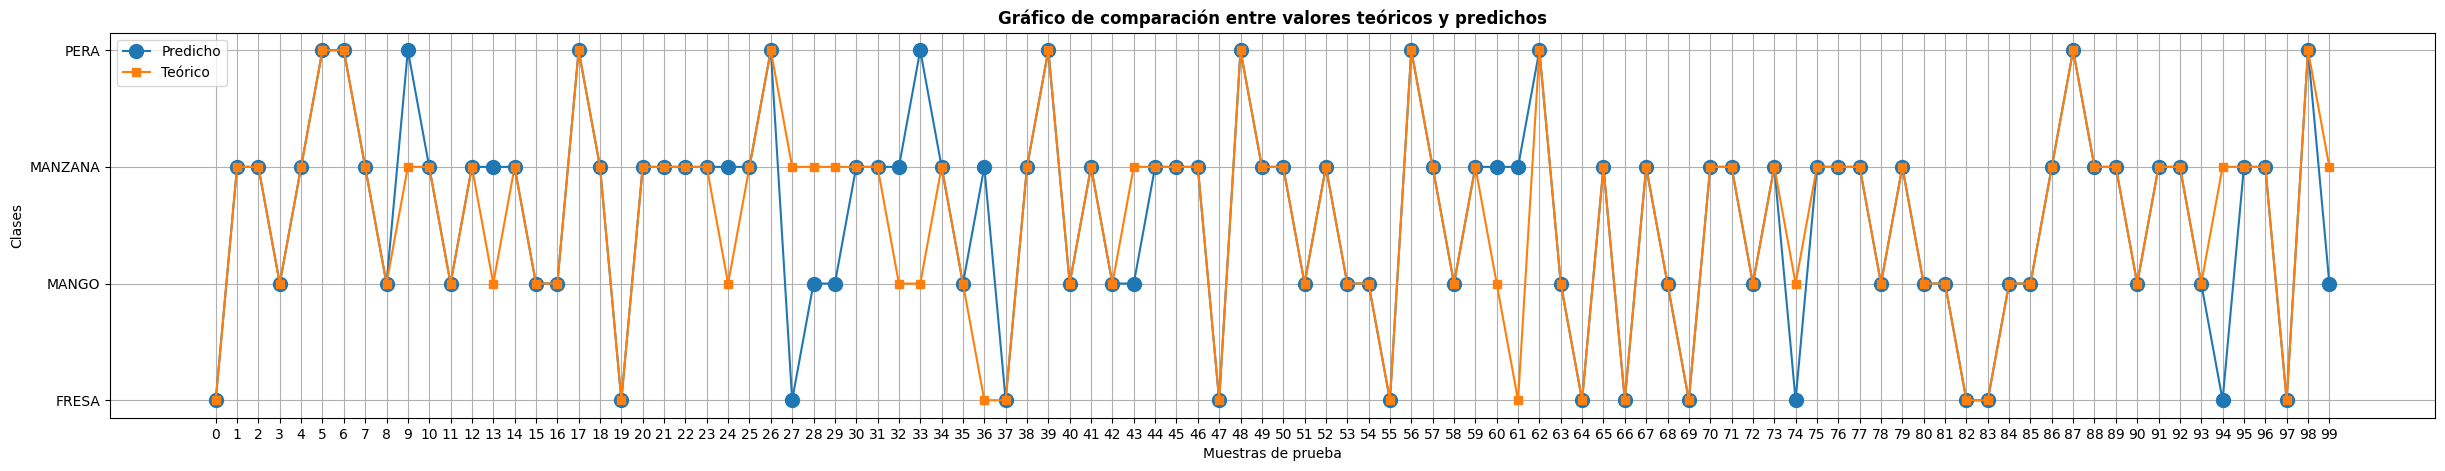

In [16]:
plt.subplots(figsize=(30, 5))
plt.plot(y_test, label='Predicho', marker='o', markersize=10, linestyle='-')
plt.plot(y_pred_classes, label='Teórico', marker='s', markersize=6, linestyle='-')

plt.yticks(np.arange(4), ['FRESA', 'MANGO', 'MANZANA', 'PERA'])
plt.xticks(np.arange(len(y_test)))
plt.title('Gráfico de comparación entre valores teóricos y predichos', fontweight="bold")
plt.xlabel('Muestras de prueba')
plt.ylabel('Clases')
plt.legend(loc='upper left')
plt.grid()
plt.show()
